### Childcare Cost and Women Labor Participation Rate - A County-Level Estimate

Childcare costs have been consuming a significant portion of family income and have been found to rapidly influence women's labor force participation. This study employs machine learning models, Random Forest and XGBoost, to analyze factors influencing women's labor force participation rates at the county level. Key variables considered include childcare costs for services from center-based and home-based organizations, state status, county size, median family income, women's mediam income, family poverty rate, and relevant demographic factors. 

These models successfully predicted women's labor force participation rates with over 94% accuracy, with the XGBoost model significantly enhancing predictive power, achieving over 99% accuracy. Performance was assessed using accuracy score.


In [154]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import plotly.express as px
sns.set()

In [155]:
pd.set_option('display.max_column',None)
df = pd.read_csv('C:\D\Reaserch for JOBS\Effortless Products\Childcare Cost\Working Files/Childcare Cost & Minimum Wage.csv')
df.head()

,Statename,Countyname,CountyFIPScode,Infantcenterbasedprice2018,Infantcenterbasedprice2023estima,Infantcenterbasedpriceasshareoff,Infanthomebasedprice2018,Infanthomebasedprice2023estimate,Infanthomebasedpriceasshareoffam,Toddlercenterbasedprice2018,Toddlercenterbasedprice2023estim,Toddlercenterbasedpriceasshareof,Toddlerhomebasedprice2018,Toddlerhomebasedprice2023estimat,Toddlerhomebasedpriceasshareoffa,Preschoolcenterbasedprice2018,Preschoolcenterbasedprice2023est,Preschoolcenterbasedpriceasshare,Preschoolhomebasedprice2018,Preschoolhomebasedprice2023estim,Preschoolhomebasedpriceasshareof,Schoolagecenterbasedprice2018,Schoolagecenterbasedprice2023est,Schoolagecenterbasedpriceasshare,Schoolagehomebasedprice2018,Schoolagehomebasedprice2023estim,Schoolagehomebasedpriceasshareof,Womenslaborforceparticipationrat,Womensmedianearnings,Medianfamilyincome,Percentoffamiliesinpoverty,Totalpopulation,PercentAsian,PercentBlack,PercentHispanicofanyrace,PercentWhite,Num_Totalpopulation,Num_Womensmedianearnings,CountySize
0,Texas,Williamson County,48491,"9,407","11,072",9.700000,"8,245","9,704",8.5,"8,642","10,173",8.9,"7,834","9,221",8.1,"8,011","9,429",8.3,"7,413","8,725",7.6,"7,563","8,903",7.8,"6,659","7,838",6.9,74.699997,"32,939","96,973",4.5,"527,057",6.4,6.3,24.299999,80.199997,527057,32939,Large
1,Tennessee,Shelby County,47157,"9,620","11,323",15.200000,"7,020","8,263",11.1,"7,677","9,036",12.1,"6,383","7,513",10.1,"7,677","9,036",12.1,"6,383","7,513",10.1,"3,068","3,611",4.8,"3,380","3,978",5.3,73.500000,"27,217","63,343",15.7,"937,005",2.6,53.5,6.200000,39.299999,937005,27217,Large
2,Texas,Denton County,48121,"9,441","11,112",9.200000,"8,221","9,677",8.0,"8,640","10,169",8.4,"7,790","9,169",7.6,"7,977","9,389",7.8,"7,350","8,652",7.2,"7,509","8,838",7.3,"6,562","7,724",6.4,76.599998,"34,452","102,771",5.1,"807,047",8.3,9.5,19.200001,75.000000,807047,34452,Large
3,California,Ventura County,6111,"16,832","19,813",17.799999,"10,950","12,889",11.6,"11,627","13,685",12.3,"10,152","11,950",10.8,"11,627","13,685",12.3,"10,152","11,950",10.8,"11,276","13,272",12.0,"8,666","10,200",9.2,73.300003,"30,124","94,340",6.6,"848,112",7.3,1.7,42.400002,80.199997,848112,30124,Large
4,New Jersey,Middlesex County,34023,"14,944","17,590",14.500000,"8,857","10,425",8.6,"12,448","14,652",12.1,"8,474","9,975",8.2,"11,262","13,256",11.0,"8,030","9,452",7.8,"12,152","14,303",11.8,"6,765","7,962",6.6,72.199997,"36,711","102,797",6.2,"826,698",23.9,10.2,20.799999,58.900002,826698,36711,Large


In [156]:
df.describe()

,CountyFIPScode,Infantcenterbasedpriceasshareoff,Infanthomebasedpriceasshareoffam,Toddlercenterbasedpriceasshareof,Toddlerhomebasedpriceasshareoffa,Preschoolcenterbasedpriceasshare,Preschoolhomebasedpriceasshareof,Schoolagecenterbasedpriceasshare,Schoolagehomebasedpriceasshareof,Womenslaborforceparticipationrat,Percentoffamiliesinpoverty,PercentAsian,PercentBlack,PercentHispanicofanyrace,PercentWhite,Num_Totalpopulation,Num_Womensmedianearnings
count,3142.000000,2818.000000,2798.000000,2818.000000,2798.000000,2818.000000,2798.000000,2818.000000,2798.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3.142000e+03,3142.000000
mean,30383.649268,12.911710,10.146497,11.724414,9.607398,10.950035,9.357184,9.219517,8.384274,69.505952,11.238447,1.373456,9.059771,9.262826,83.055761,1.027699e+05,24485.186187
std,15162.508374,3.209841,2.322611,2.656184,2.132896,2.455144,2.095362,2.576939,2.203782,7.813584,5.664616,2.814638,14.531032,13.790453,16.870786,3.299077e+05,4793.424186
min,1001.000000,2.400000,4.600000,1.900000,4.200000,1.900000,3.800000,1.700000,2.700000,33.599998,0.000000,0.000000,0.000000,0.000000,3.900000,7.500000e+01,7336.000000
25%,18177.500000,10.800000,8.600000,10.000000,8.100000,9.300000,7.925000,7.600000,7.000000,64.400002,7.300000,0.300000,0.700000,2.100000,76.599998,1.094800e+04,21614.750000
50%,29176.000000,12.700000,9.900000,11.500000,9.500000,10.800000,9.250000,9.200000,8.300000,70.000000,10.300000,0.600000,2.300000,4.100000,89.649998,2.573600e+04,23926.000000
75%,45080.500000,14.600000,11.400000,13.200000,10.800000,12.300000,10.500000,10.800000,9.700000,75.099998,13.900000,1.300000,10.175000,9.600000,95.099998,6.720900e+04,26579.000000
max,56045.000000,47.000000,23.400000,36.500000,22.500000,33.500000,24.400000,27.299999,19.600000,95.199997,52.099998,42.500000,87.400002,99.099998,100.000000,1.009805e+07,62919.000000


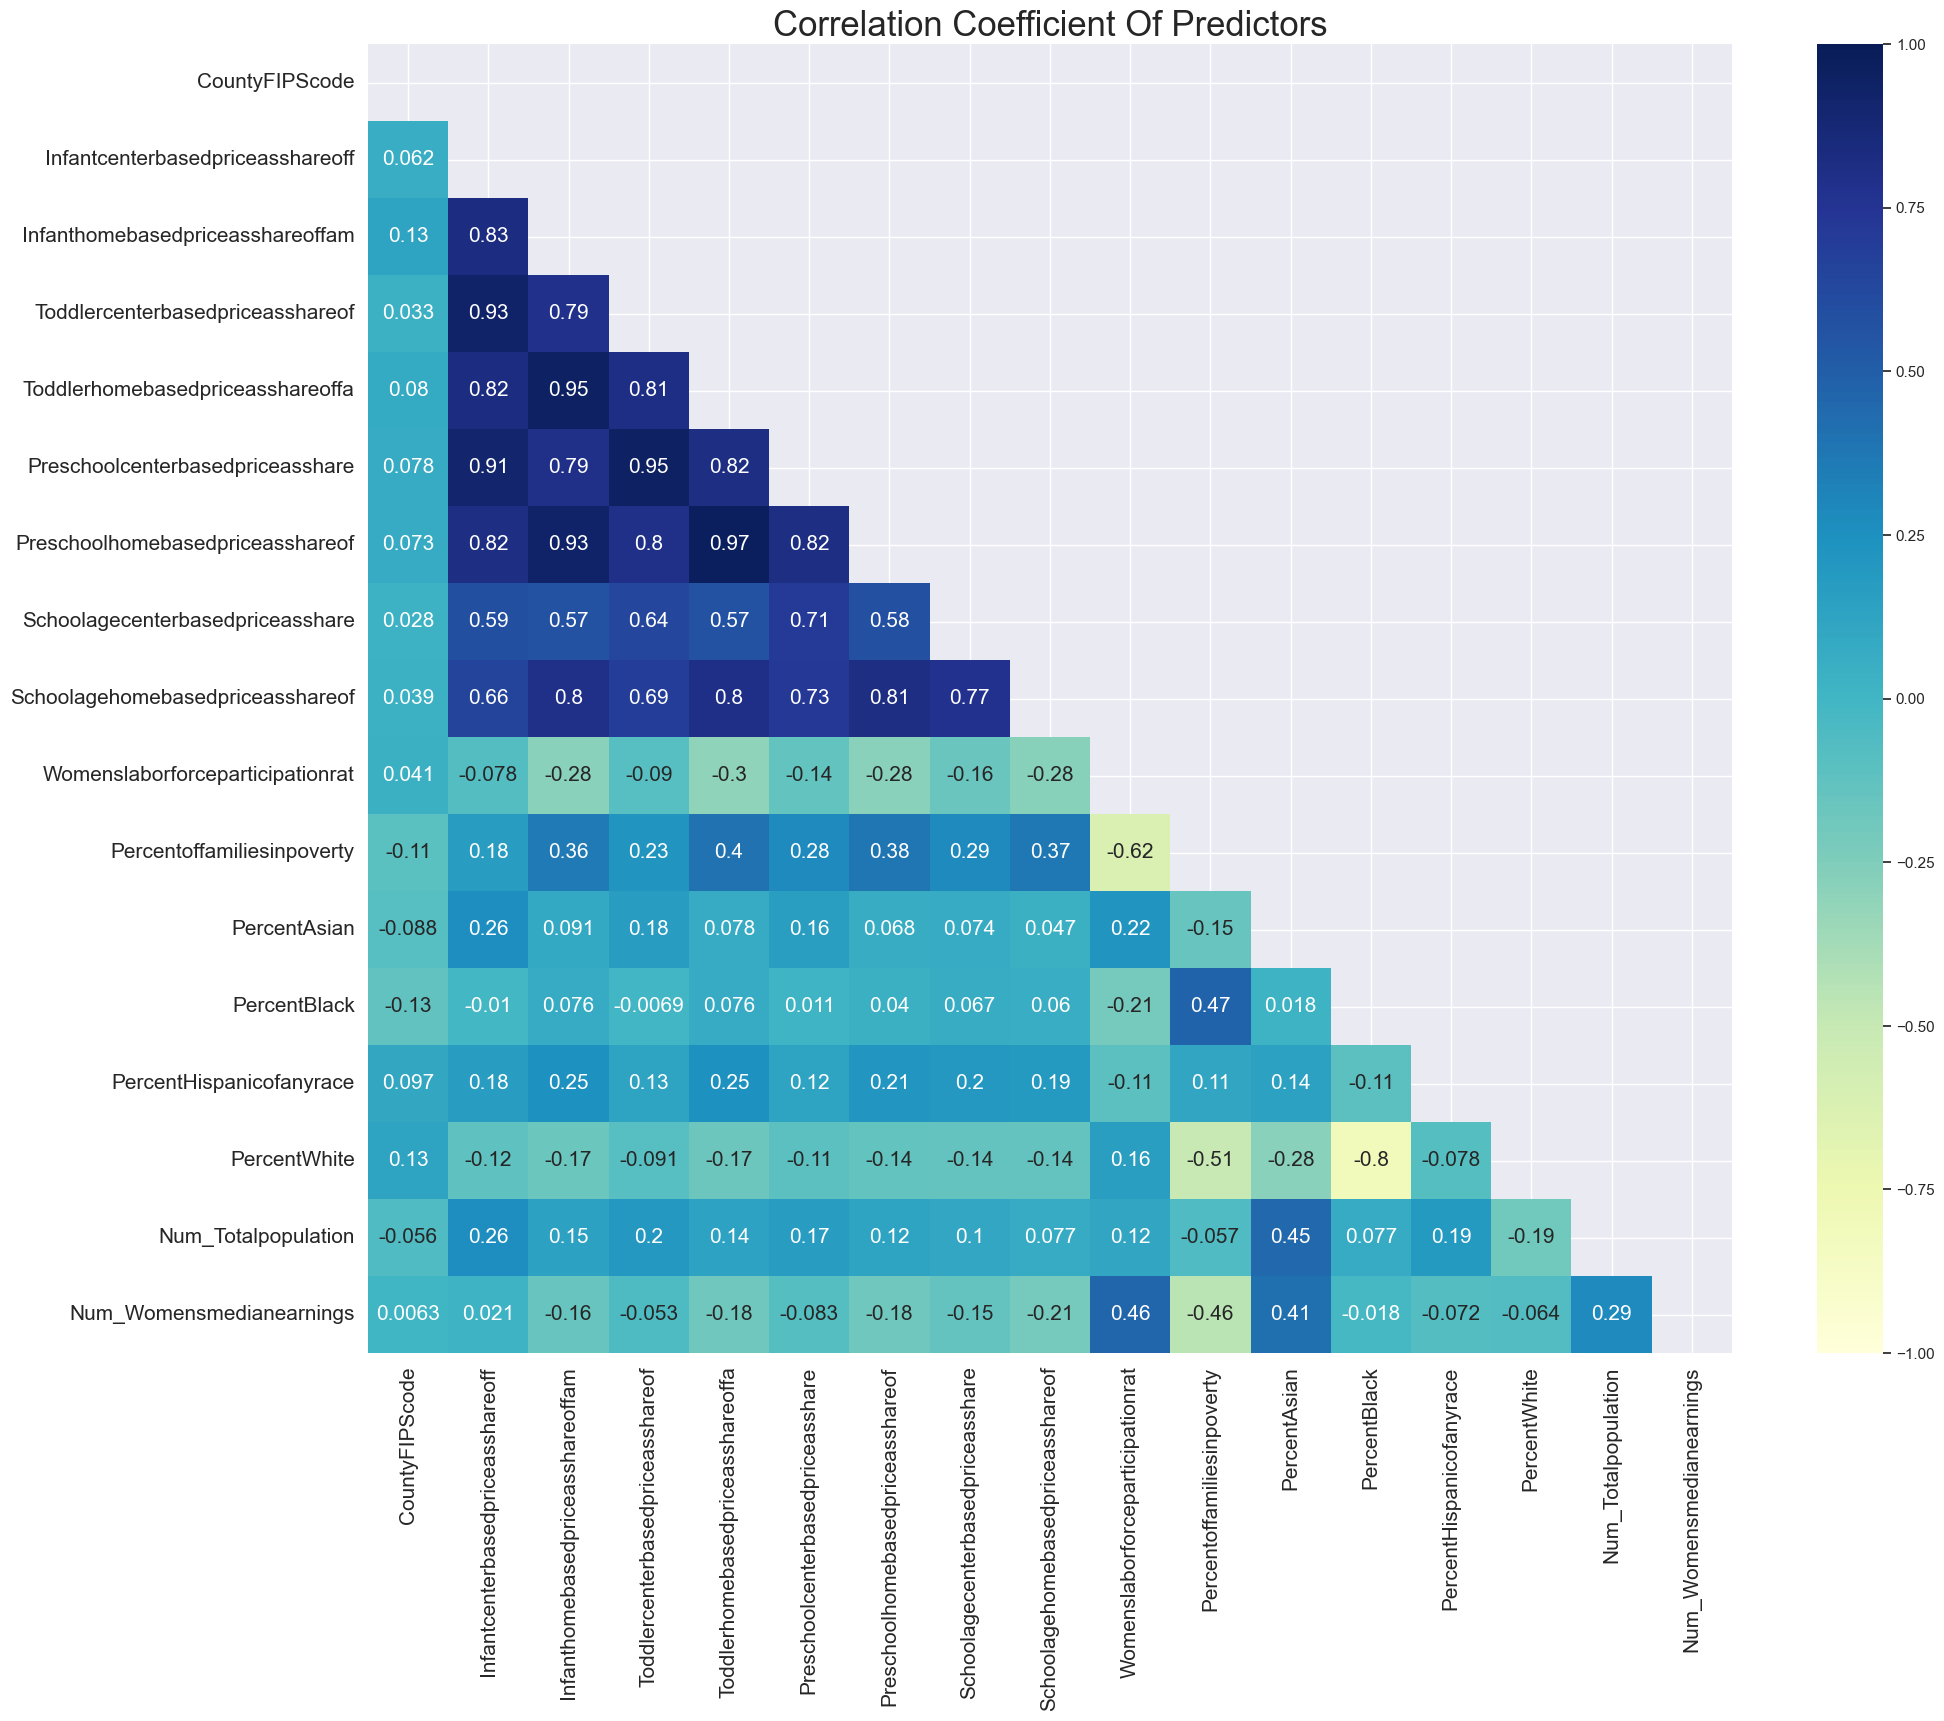

In [157]:
# Set figure size
plt.figure(figsize=(22,17))


# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
# Generate the heatmap
sns.heatmap(data.corr(), annot=True, mask=mask, vmin=-1, vmax=1, cmap='YlGnBu', annot_kws={"size": 15})
plt.title('Correlation Coefficient Of Predictors',fontsize = 25)
plt.xticks(fontsize=15)  # For x-axis variable names
plt.yticks(fontsize=15)  # For y-axis variable names
plt.show()

### Predictive variables:

In [158]:
data.head()

,CountyFIPScode,Infantcenterbasedpriceasshareoff,Infanthomebasedpriceasshareoffam,Toddlercenterbasedpriceasshareof,Toddlerhomebasedpriceasshareoffa,Preschoolcenterbasedpriceasshare,Preschoolhomebasedpriceasshareof,Schoolagecenterbasedpriceasshare,Schoolagehomebasedpriceasshareof,Womenslaborforceparticipationrat,Percentoffamiliesinpoverty,PercentAsian,PercentBlack,PercentHispanicofanyrace,PercentWhite,Num_Totalpopulation,Num_Womensmedianearnings
0,48491,9.700000,8.5,8.9,8.1,8.3,7.6,7.8,6.9,74.699997,4.5,6.4,6.3,24.299999,80.199997,527057,32939
1,47157,15.200000,11.1,12.1,10.1,12.1,10.1,4.8,5.3,73.500000,15.7,2.6,53.5,6.200000,39.299999,937005,27217
2,48121,9.200000,8.0,8.4,7.6,7.8,7.2,7.3,6.4,76.599998,5.1,8.3,9.5,19.200001,75.000000,807047,34452
3,6111,17.799999,11.6,12.3,10.8,12.3,10.8,12.0,9.2,73.300003,6.6,7.3,1.7,42.400002,80.199997,848112,30124
4,34023,14.500000,8.6,12.1,8.2,11.0,7.8,11.8,6.6,72.199997,6.2,23.9,10.2,20.799999,58.900002,826698,36711


C:\Users\bluei\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


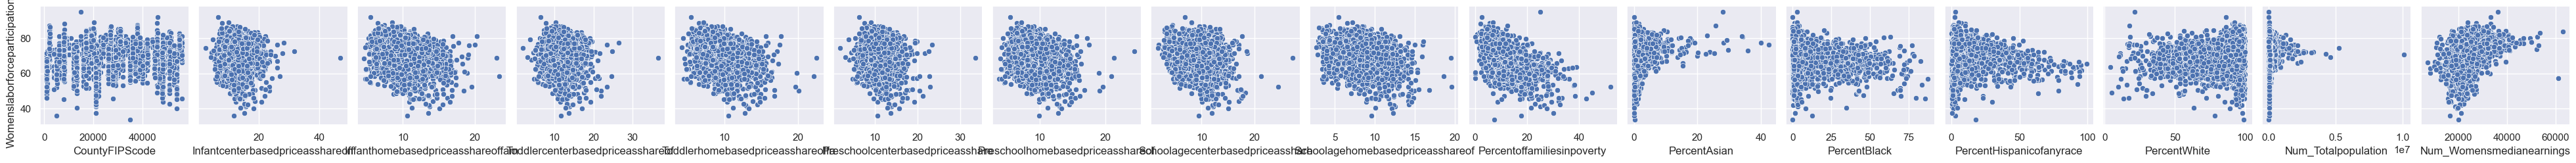

In [159]:
#fig, axes = plt.subplots(3, 3, figsize=(20, 15))
sns.pairplot( 
    data,  
    y_vars ='Womenslaborforceparticipationrat',   
    x_vars = data.columns[data.columns != "Womenslaborforceparticipationrat"]
)

### Split data and perform models:

In [160]:
data.isnull().sum()

CountyFIPScode                        0
Infantcenterbasedpriceasshareoff    324
Infanthomebasedpriceasshareoffam    344
Toddlercenterbasedpriceasshareof    324
Toddlerhomebasedpriceasshareoffa    344
Preschoolcenterbasedpriceasshare    324
Preschoolhomebasedpriceasshareof    344
Schoolagecenterbasedpriceasshare    324
Schoolagehomebasedpriceasshareof    344
Womenslaborforceparticipationrat      0
Percentoffamiliesinpoverty            0
PercentAsian                          0
PercentBlack                          0
PercentHispanicofanyrace              0
PercentWhite                          0
Num_Totalpopulation                   0
Num_Womensmedianearnings              0
dtype: int64

In [161]:
df_cleaned = df.dropna()

In [162]:
df_cleaned.isnull().sum()

Statename                           0
Countyname                          0
CountyFIPScode                      0
Infantcenterbasedprice2018          0
Infantcenterbasedprice2023estima    0
Infantcenterbasedpriceasshareoff    0
Infanthomebasedprice2018            0
Infanthomebasedprice2023estimate    0
Infanthomebasedpriceasshareoffam    0
Toddlercenterbasedprice2018         0
Toddlercenterbasedprice2023estim    0
Toddlercenterbasedpriceasshareof    0
Toddlerhomebasedprice2018           0
Toddlerhomebasedprice2023estimat    0
Toddlerhomebasedpriceasshareoffa    0
Preschoolcenterbasedprice2018       0
Preschoolcenterbasedprice2023est    0
Preschoolcenterbasedpriceasshare    0
Preschoolhomebasedprice2018         0
Preschoolhomebasedprice2023estim    0
Preschoolhomebasedpriceasshareof    0
Schoolagecenterbasedprice2018       0
Schoolagecenterbasedprice2023est    0
Schoolagecenterbasedpriceasshare    0
Schoolagehomebasedprice2018         0
Schoolagehomebasedprice2023estim    0
Schoolagehom

### The predicted and predictive variables:

In [163]:
Y = df_cleaned['Womenslaborforceparticipationrat']

# Shify CountySize, Statename to dummy variables:
df_cleaned = pd.get_dummies(df_cleaned, columns=["Statename","CountySize"]) 
df_cleaned2 = df_cleaned.select_dtypes(exclude=['object'])
X = df_cleaned2.drop(['Womenslaborforceparticipationrat', 'CountyFIPScode'], axis=1)
#X_encoded = df_cleaned.drop(['Countyname', 'Statename', 'CountySize', 'CountyFIPScode'], axis=1)

In [164]:
print(Y)

0       74.699997
1       73.500000
2       76.599998
3       73.300003
4       72.199997
          ...    
3137    75.400002
3138    72.500000
3139    77.000000
3140    77.099998
3141    68.599998
Name: Womenslaborforceparticipationrat, Length: 2790, dtype: float64


In [165]:
print(X)

      Infantcenterbasedpriceasshareoff  Infanthomebasedpriceasshareoffam  \
0                             9.700000                               8.5   
1                            15.200000                              11.1   
2                             9.200000                               8.0   
3                            17.799999                              11.6   
4                            14.500000                               8.6   
...                                ...                               ...   
3137                         10.900000                               9.0   
3138                         19.400000                              14.6   
3139                         17.400000                              11.6   
3140                         16.600000                              11.4   
3141                         16.799999                              11.5   

      Toddlercenterbasedpriceasshareof  Toddlerhomebasedpriceasshareoffa  \
0          

In [166]:
print(len(X))
print(len(Y)) 

2790
2790


In [167]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

## Predictive Models

### Random Forest

In [168]:
from sklearn.ensemble import RandomForestRegressor
Model1 = RandomForestRegressor(random_state=42).fit(X_train,Y_train)
Model1.score(X_train, Y_train)

0.945719995819304

In [169]:
Model1.fit(X_test,Y_test)
Model1.score(X_test, Y_test)

0.9452071031452335

In [170]:
Y_pred1 =Model1.predict(X_test)
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred1)

0.9452071031452335

### XGBoost

In [171]:
import xgboost as xgb
from xgboost import XGBRegressor

In [172]:
Model2 = XGBRegressor().fit(X_train, Y_train)
Model2.score(X_train,Y_train)

0.9822616795144637

In [173]:
Model2 = XGBRegressor().fit(X_test, Y_test)
Model2.score(X_test,Y_test)

0.9997786859091679

In [174]:
Y_pred2 = Model2.predict(X_test)
r2_score(Y_test,Y_pred2)

0.9997786859091679